Task 1 :
    
        Make a diabetes prediction with ML
        

About this project :-
The objective of this project is to classify whether someone has diabetes or not.
Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'
The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

#what is diabetes?
     
    
     
     Diabetes is a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Learning how to use Machine Learning can help us predict Diabetes. Let’s get started!
     

In [82]:
#import the dependence 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
diabetes_data = pd.read_csv('C:\\Users\\Baskar\\Downloads\\diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#shape of the data
diabetes_data.shape

(768, 9)

In [4]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#count of every columns unique value
for column in diabetes_data.columns:
    num_distinct_values = len(diabetes_data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Pregnancies: 17 distinct values
Glucose: 136 distinct values
BloodPressure: 47 distinct values
SkinThickness: 51 distinct values
Insulin: 186 distinct values
BMI: 248 distinct values
DiabetesPedigreeFunction: 517 distinct values
Age: 52 distinct values
Outcome: 2 distinct values


In [6]:
#null value counts
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#describe data
diabetes_data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [8]:
# information about the data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#count of target variable
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

the data is imbalanced
diabete = 268
no diabete = 500

In [10]:
diabetes_data['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [11]:
#change the max of the Pregnancies data 10
diabetes_data['Pregnancies'] = diabetes_data['Pregnancies'].replace([11,12,13,14,15,16,17],10)

In [12]:
# max of the diabetes
diabetes_data['Pregnancies'].max()

10

In [13]:
#mean of the glucose data
dia_gl=diabetes_data['Glucose'].mean()

In [14]:
# change the 0 to mean if the data
diabetes_data['Glucose'] = diabetes_data['Glucose'] .replace([0],dia_gl)

In [15]:
#mean of diabetes_data
dia_bp=diabetes_data['BloodPressure'].mean().round(2)

In [16]:
diabetes_data[diabetes_data['BloodPressure'] ==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,10,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


In [17]:
#change the null to mean of the bp data
diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].replace([0],dia_bp)

In [18]:
diabetes_data[diabetes_data['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.00,0,0,23.3,0.672,32,1
5,5,116.0,74.00,0,0,25.6,0.201,30,0
7,10,115.0,69.11,0,0,35.3,0.134,29,0
9,8,125.0,96.00,0,0,0.0,0.232,54,1
10,4,110.0,92.00,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.00,0,0,36.3,0.258,52,1
758,1,106.0,76.00,0,0,37.5,0.197,26,0
759,6,190.0,92.00,0,0,35.5,0.278,66,1
762,9,89.0,62.00,0,0,22.5,0.142,33,0


In [19]:
# mean of skin thickness
dia_sk = diabetes_data['SkinThickness'].median()
dia_sk

23.0

In [20]:
#change the null to mean of the bp data
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].replace([0],dia_sk)

In [21]:
diabetes_data[diabetes_data['Insulin'] ==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.00,35,0,33.6,0.627,50,1
1,1,85.0,66.00,29,0,26.6,0.351,31,0
2,8,183.0,64.00,23,0,23.3,0.672,32,1
5,5,116.0,74.00,23,0,25.6,0.201,30,0
7,10,115.0,69.11,23,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.00,31,0,44.0,0.403,43,1
762,9,89.0,62.00,23,0,22.5,0.142,33,0
764,2,122.0,70.00,27,0,36.8,0.340,27,0
766,1,126.0,60.00,23,0,30.1,0.349,47,1


In [22]:
# i asked about insulin with domain experts 
# if the patient affect in diabetes they only give the insulin 
# so zeros is not replaceable one so we keep it 0

In [23]:
diabetes_data[diabetes_data['BMI'] ==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.00,23,0,0.0,0.232,54,1
49,7,105.0,69.11,23,0,0.0,0.305,24,0
60,2,84.0,69.11,23,0,0.0,0.304,21,0
81,2,74.0,69.11,23,0,0.0,0.102,22,0
145,0,102.0,75.00,23,0,0.0,0.572,21,0
371,0,118.0,64.00,23,89,0.0,1.731,21,0
426,0,94.0,69.11,23,0,0.0,0.256,25,0
494,3,80.0,69.11,23,0,0.0,0.174,22,0
522,6,114.0,69.11,23,0,0.0,0.189,26,0
684,5,136.0,82.00,23,0,0.0,0.640,69,0


In [24]:
import statistics
dia_bmi=diabetes_data['BMI'].mean().round(2)

In [25]:
diabetes_data['BMI'] = diabetes_data['BMI'].replace([0],dia_bmi)

In [26]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,23,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [27]:
dia_ins = diabetes_data['Insulin'].median()
diabetes_data['Insulin'] = diabetes_data['Insulin'].replace([0],dia_ins)

# univariate analysis

Text(0.5, 1.0, 'distribution of Pregnancies')

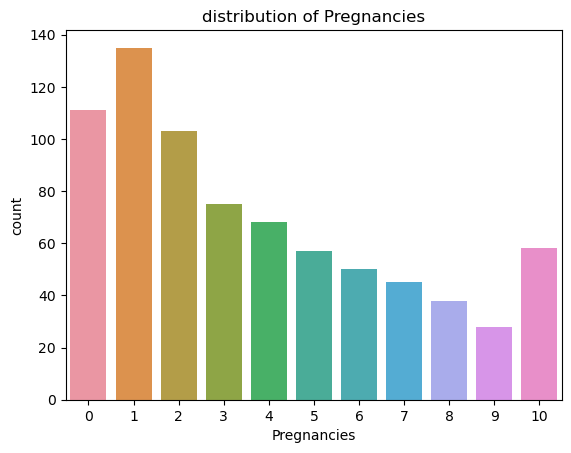

In [28]:
sns.countplot(x=diabetes_data['Pregnancies'])
plt.title('distribution of Pregnancies')

Text(0.5, 1.0, 'distribution of Age')

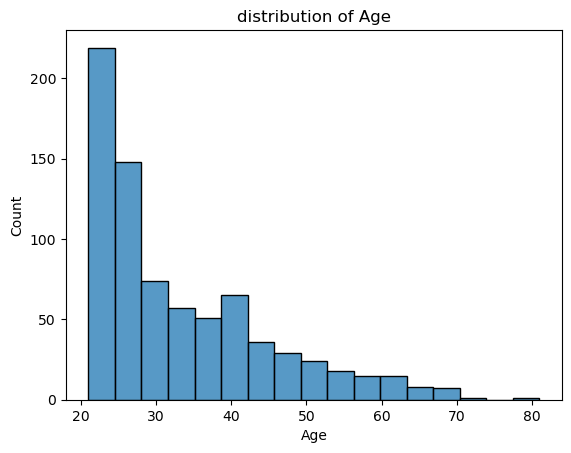

In [29]:
sns.histplot(x=diabetes_data['Age'])
plt.title('distribution of Age')

Text(0.5, 1.0, 'distribution of BMI(body mass index)')

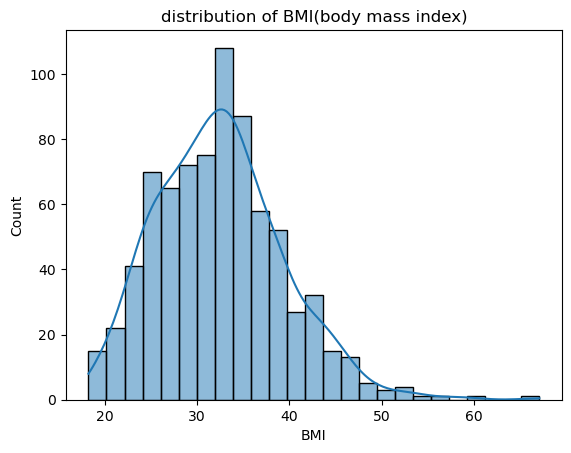

In [30]:
sns.histplot(x=diabetes_data['BMI'],kde=True)
plt.title('distribution of BMI(body mass index)')

Text(0.5, 1.0, 'distribution of DiabetesPedigreeFunction')

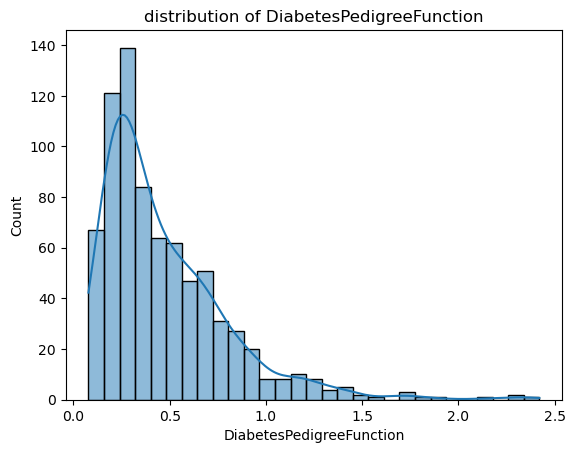

In [31]:
sns.histplot(x=diabetes_data['DiabetesPedigreeFunction'],kde=True)
plt.title('distribution of DiabetesPedigreeFunction')

Text(0.5, 1.0, 'distribution of Insulin')

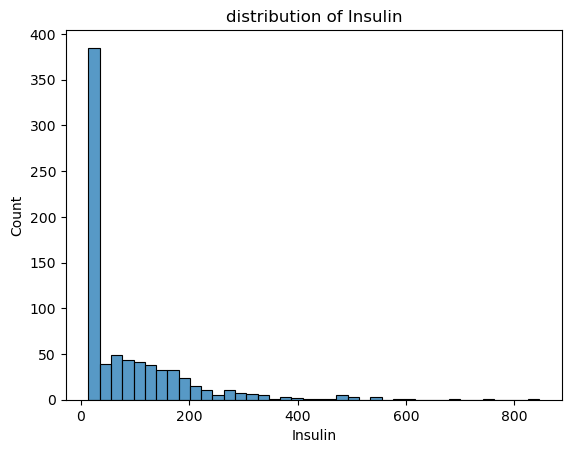

In [32]:
sns.histplot(x=diabetes_data['Insulin'])
plt.title('distribution of Insulin')

Text(0.5, 1.0, 'distribution of Skinthickness')

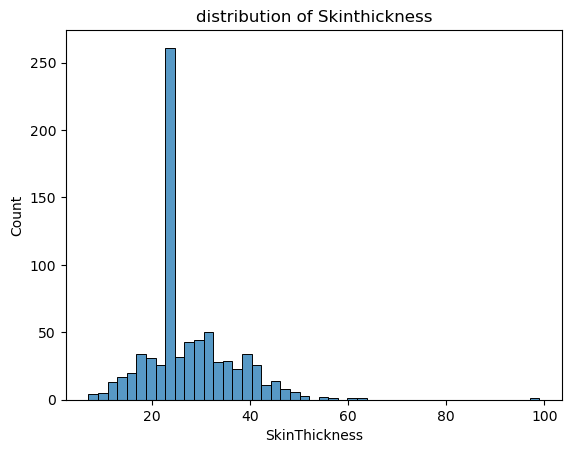

In [33]:
sns.histplot(x=diabetes_data['SkinThickness'])
plt.title('distribution of Skinthickness')

Text(0.5, 1.0, 'distribution of BloodPressure')

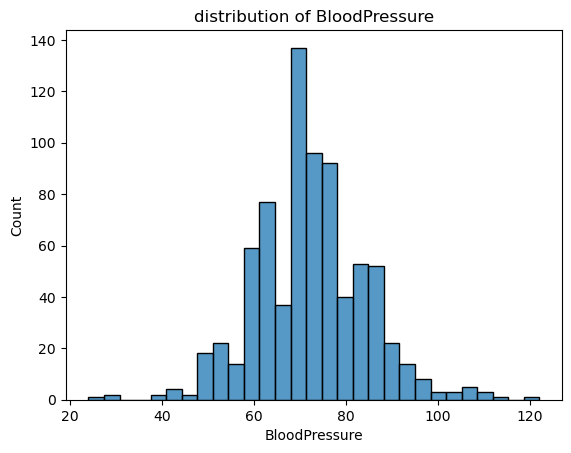

In [34]:
sns.histplot(x=diabetes_data['BloodPressure'])
plt.title('distribution of BloodPressure')

Text(0.5, 1.0, 'distribution of Glucose')

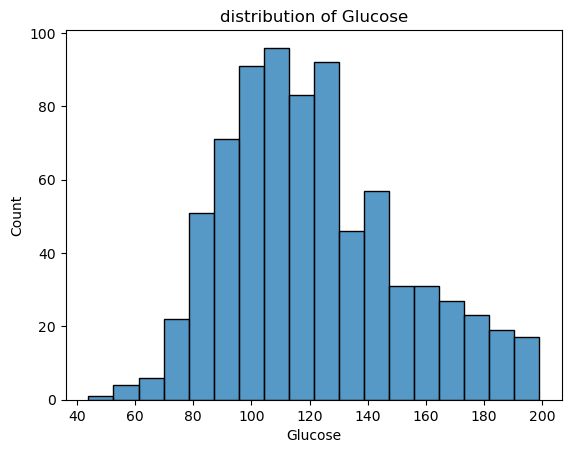

In [35]:
sns.histplot(x=diabetes_data['Glucose'])
plt.title('distribution of Glucose')

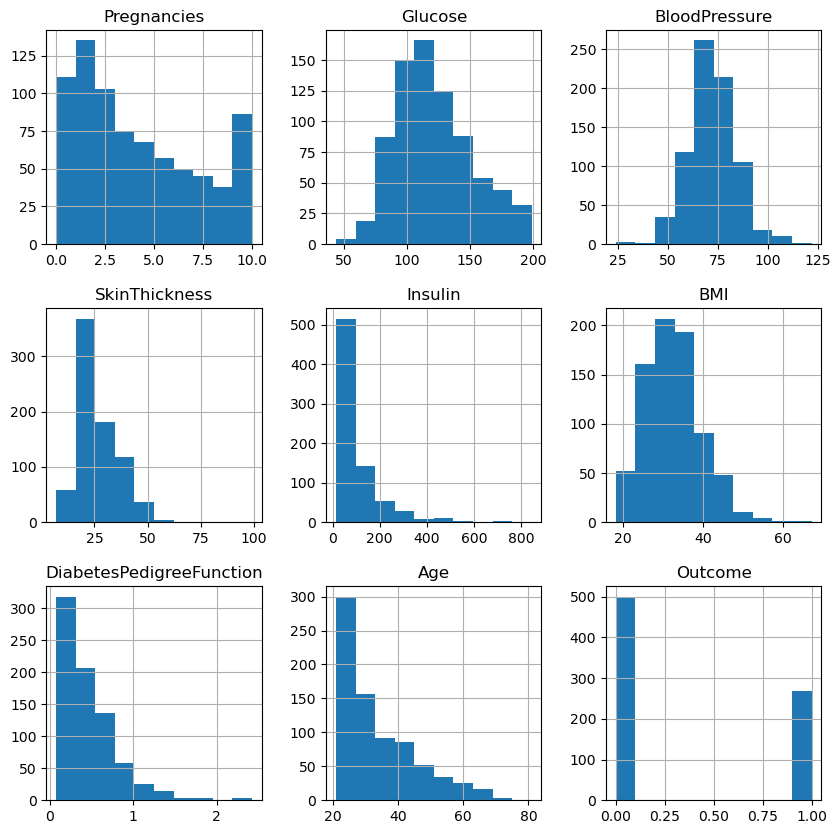

In [36]:
#histogram for each  feature
diabetes_data.hist(bins=10,figsize=(10,10))
plt.show()

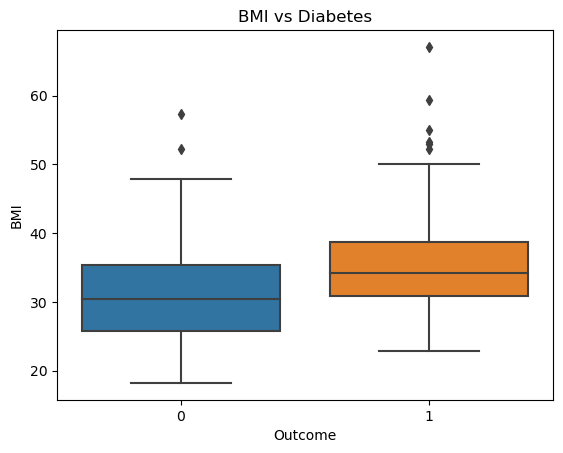

In [37]:
#bivariate analysis
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='Outcome', y='BMI', data=diabetes_data)
plt.title('BMI vs Diabetes')
plt.show()

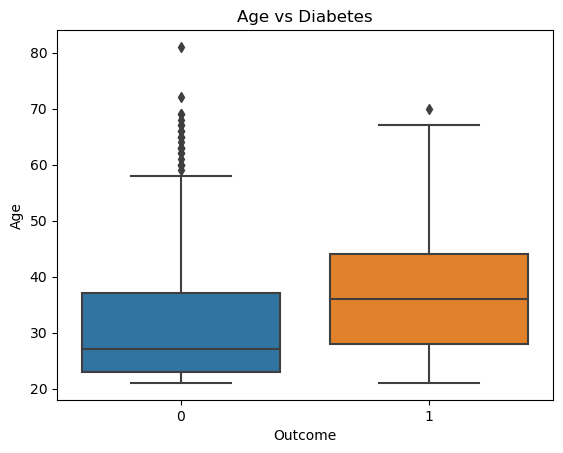

In [38]:
sns.boxplot(x='Outcome', y='Age', data=diabetes_data)
plt.title('Age vs Diabetes')
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

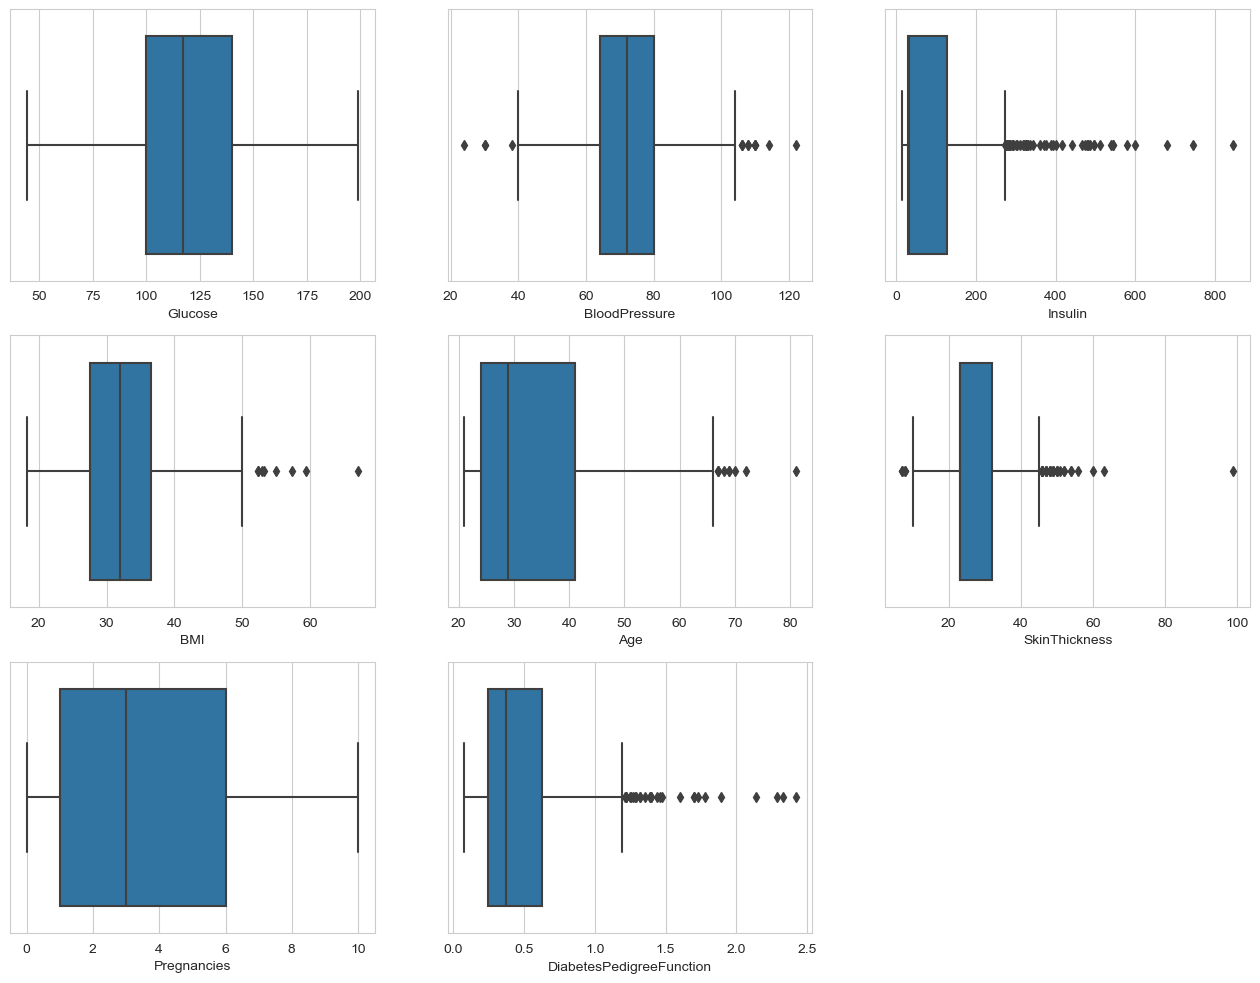

In [40]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=diabetes_data['Glucose'])
plt.subplot(3,3,2)
sns.boxplot(x=diabetes_data['BloodPressure'])
plt.subplot(3,3,3)
sns.boxplot(x=diabetes_data['Insulin'])
plt.subplot(3,3,4)
sns.boxplot(x=diabetes_data['BMI'])
plt.subplot(3,3,5)
sns.boxplot(x=diabetes_data['Age'])
plt.subplot(3,3,6)
sns.boxplot(x=diabetes_data['SkinThickness'])
plt.subplot(3,3,7)
sns.boxplot(x=diabetes_data['Pregnancies'])
plt.subplot(3,3,8)
sns.boxplot(x=diabetes_data['DiabetesPedigreeFunction'])

# feature selection


<Axes: >

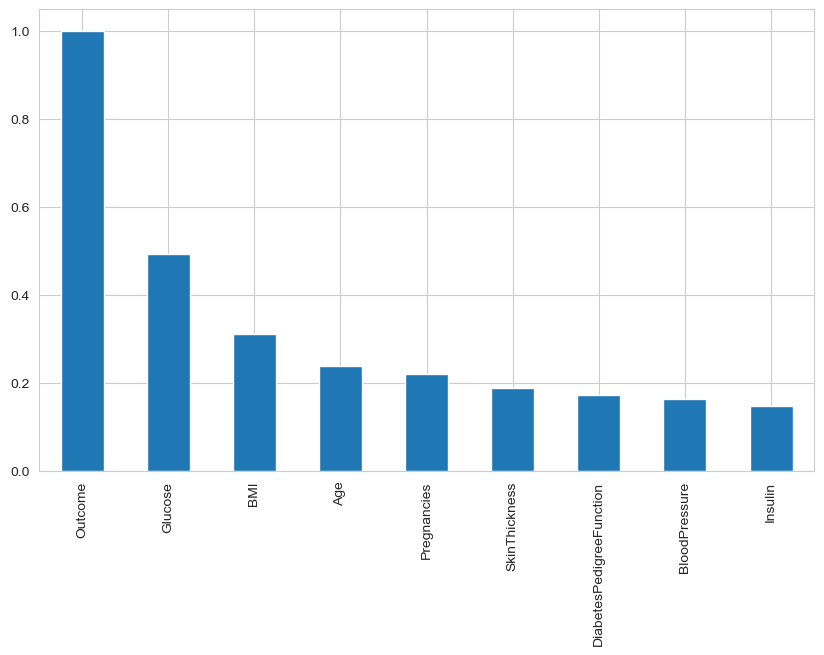

In [78]:
#feature and its relationship with target variable
plt.figure(figsize=(10,6))
diabetes_data.corr()['Outcome'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

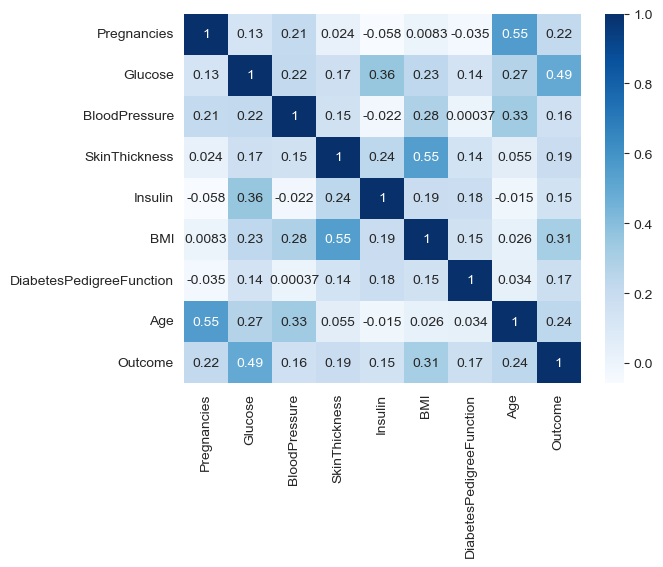

In [42]:
#correlation heatmap
sns.heatmap(diabetes_data.corr(),annot=True,cmap='Blues')

In [44]:
from sklearn.preprocessing import QuantileTransformer
x=diabetes_data
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df=quantile.transform(X)
df=pd.DataFrame(X)
df.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','BloodPressure','DiabetesPedigreeFunction','Insulin','diabetes']
df.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,BloodPressure,DiabetesPedigreeFunction,Insulin,diabetes
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


<Axes: xlabel='DiabetesPedigreeFunction'>

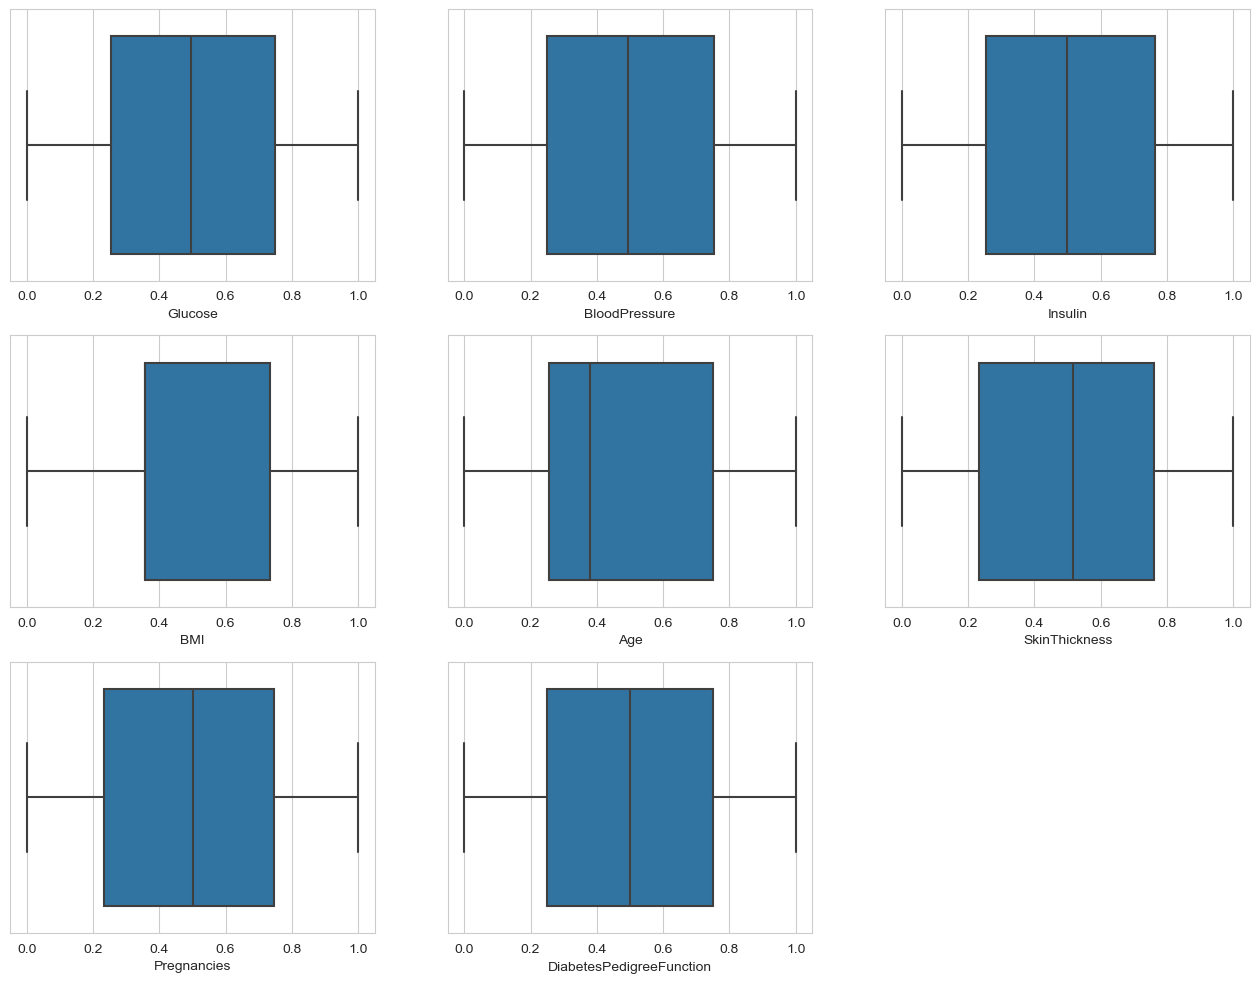

In [45]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df['Glucose'])
plt.subplot(3,3,2)
sns.boxplot(x=df['BloodPressure'])
plt.subplot(3,3,3)
sns.boxplot(x=df['Insulin'])
plt.subplot(3,3,4)
sns.boxplot(x=df['BMI'])
plt.subplot(3,3,5)
sns.boxplot(x=df['Age'])
plt.subplot(3,3,6)
sns.boxplot(x=df['SkinThickness'])
plt.subplot(3,3,7)
sns.boxplot(x=df['Pregnancies'])
plt.subplot(3,3,8)
sns.boxplot(x=df['DiabetesPedigreeFunction'])

In [47]:
X= df.drop('diabetes', axis=1)
y=df['diabetes']

In [48]:
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,BloodPressure,DiabetesPedigreeFunction,Insulin
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258


In [49]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: diabetes, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
#logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [52]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [53]:
pred=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       107
         1.0       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



<Axes: >

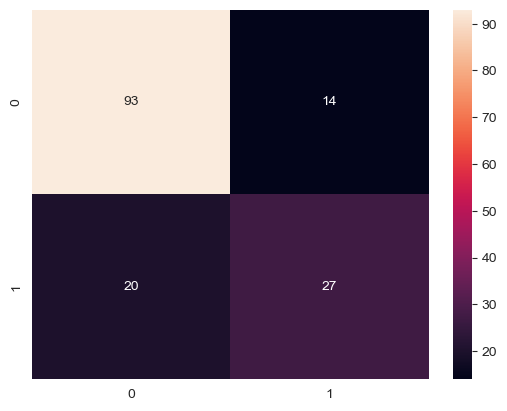

In [55]:
print("Classification Report is:\n",classification_report(y_test,pred))

sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [68]:
#decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [69]:
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [70]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [71]:
best_model=grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [72]:
dt_pred=best_model.predict(X_test)

In [73]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
confusion_matrix(y_test,dt_pred)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



array([[101,   6],
       [ 26,  21]], dtype=int64)

In [74]:
#Randomforestclassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [75]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [76]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [77]:
model = grid_search.fit(X_train, y_train)

In [79]:
pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



<Axes: >

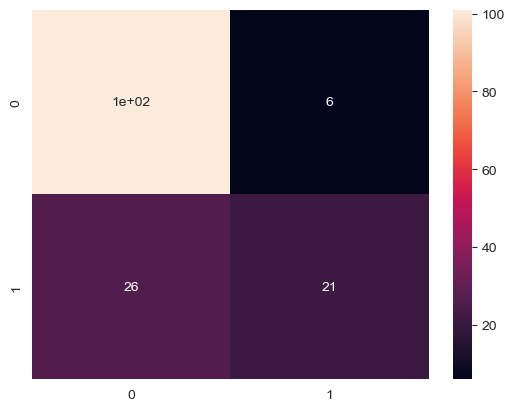

In [81]:
print("Classification Report is:\n",classification_report(y_test,pred))
print("\n F1:\n",f1_score(y_test,pred))
print("\n Precision score is:\n",precision_score(y_test,pred))
print("\n Recall score is:\n",recall_score(y_test,pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,pred),annot=True)